In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Laptop_dataset.csv')

In [3]:
df.shape

(1302, 11)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   object 
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   object 
 10  Price             1302 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.0+ KB


# Data Cleaning

In [6]:
df.duplicated().sum()

29

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [10]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

# Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

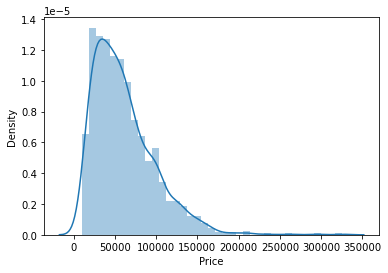

In [12]:
sns.distplot(df['Price'])

<AxesSubplot:>

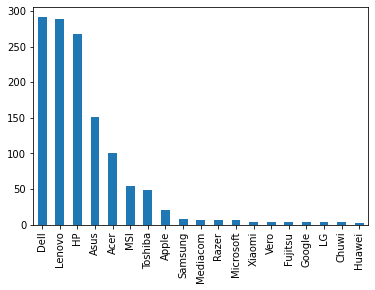

In [13]:
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot:>

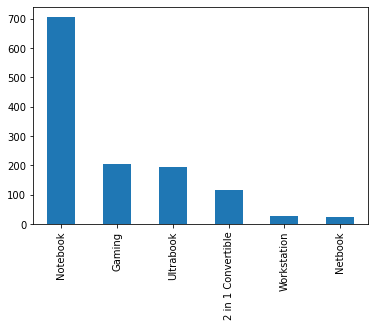

In [14]:
df['TypeName'].value_counts().plot(kind='bar')

# Data Pre-processing

In [15]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200               

In [16]:
# Adding a new column 'Touchscreen' from 'ScreenResolution' column

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
731,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.7200,0
876,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Linux,2.00,21258.1872,0
1033,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.95,63669.6000,0
75,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,50562.7200,0
257,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.5200,0


In [17]:
# Adding a new column 'IPS' from 'ScreenResolution' column

df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,81997.92,0,0
604,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,24775.20,0,0
880,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,90576.00,1,0
1270,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,0,1


In [18]:
# Adding 2 new columns 'X_resolution' and 'Y_resolution' from 'ScreenResolution' column

new = df['ScreenResolution'].str.split('x', n=1, expand=True)

df['X_resolution'] = new[0]
df['Y_resolution'] = new[1]

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
292,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.54,26053.920,0,0,1600,900
652,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77250.672,0,0,Full HD 1920,1080
1004,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,63669.600,0,0,Full HD 1920,1080
1009,HP,Notebook,14.0,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.64,36443.520,0,0,1366,768
1026,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.31,63349.920,0,0,1366,768


In [19]:
# Extracting the digits from 'X_resolution' column

df['X_resolution'] = df['X_resolution'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
62,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.7,31914.7200,0,1,1920,1080
954,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.7,79333.3872,0,1,1920,1080
726,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.2,38308.3200,0,0,1920,1080
427,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.6,58554.7200,0,0,1920,1080
157,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.1,70063.2000,1,0,1920,1080


In [20]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')

In [21]:
# Combining 'X_resolution', 'Y_resolution' and 'Inches' to form a new column 'PPI' (Pixels Per Inch)

# Formula of PPI:
# PPI = (((X_resolution)^2 + (Y_resolution)^2)^0.5)/Inches

df['PPI'] = ((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution,PPI
226,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.30,45768.0528,1,0,1920,1080,141.211998
906,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,79014.2400,0,0,1920,1080,176.232574
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.1200,0,1,1920,1080,141.211998
623,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,42570.7200,0,0,1366,768,100.454670
435,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,90309.6000,0,0,1920,1080,127.335675


In [22]:
# Dropping 'ScreenResolution', 'Inches', 'X_resolution' and 'Y_resolution' columns

df.drop(columns= ['ScreenResolution', 'Inches', 'X_resolution', 'Y_resolution'], inplace=True)

In [23]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M 6Y30 0.9GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m7-6Y75 1.2GHz      1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9420 2.9GHz        1
Name: Cpu, Length: 117, dtype: int64

In [24]:
# Adding a new column 'Cpu Name' which stores the first 3 words of 'Cpu' column

df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join( x.split()[0:3]))

df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
60,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.72,0,0,127.335675,Intel Core i7
322,Asus,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,58288.32,0,0,157.350512,Intel Core i7
642,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536.00,0,1,157.350512,Intel Core i7
56,HP,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.91,23389.92,0,0,141.211998,Intel Core i3
450,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381.92,0,0,100.454670,Intel Core i5


In [25]:
df['Cpu Name'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD Ryzen 1700                3
Intel Pentium Dual            3
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD E-Series E2-9000e         2
Intel Atom X5-Z8350           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1535M           2
Intel Atom x5-Z8300           1
AMD E-Series 9000e            1
AMD E-Series 6110             1
AMD A6-Series 7310            1
AMD E-Series E2-9000          1
AMD FX 8800P                  1
AMD FX 9

In [26]:
# Making 5 categories of Cpu Name : Intel Core i7, Intel Core i5, Intel Core i3, Other Intel Processor and AMD Processor

def fetch_processor(text):
   if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
     return text

   else:
     if text.split()[0] == 'Intel':
       return 'Other Intel Processor'
     else:
       return 'AMD Processor'

In [27]:
# Adding a new column 'Cpu Brand' which will have the 5 categories as its value

df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Brand
123,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,67718.8800,0,0,127.335675,Intel Core i7,Intel Core i7
1106,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.90,80516.2032,0,0,127.335675,Intel Core i7,Intel Core i7
242,Asus,Notebook,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,47365.9200,0,0,127.335675,Intel Core i7,Intel Core i7
1068,Dell,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,3.21,70809.1200,0,0,282.423996,Intel Core i7,Intel Core i7
683,HP,Notebook,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.7200,0,1,127.335675,Intel Core i3,Intel Core i3


In [28]:
# Dropping 'Cpu' and 'Cpu Name' columns

df.drop(columns= ['Cpu', 'Cpu Name'], inplace=True)

In [29]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel HD Graphics 620        1
AMD FirePro W6150M           1
Nvidia Quadro M3000M         1
AMD Radeon R7 M365X          1
Nvidia GeForce 920           1
Name: Gpu, Length: 109, dtype: int64

In [30]:
# Adding a new column 'Gpu Brand' which contains the first word of 'Gpu' column

df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand
990,HP,Netbook,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,101658.2400,0,0,176.232574,Other Intel Processor,Intel
467,Dell,Notebook,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.5200,0,0,141.211998,Intel Core i5,AMD
1136,HP,Workstation,8,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,210424.0320,0,1,127.335675,Intel Core i7,Nvidia
359,Dell,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76030.5600,0,0,157.350512,Intel Core i5,Intel
1063,Dell,Notebook,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0,0,141.211998,Intel Core i7,AMD


In [31]:
df['Gpu Brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
Name: Gpu Brand, dtype: int64

In [32]:
# Dropping 'Gpu' column

df.drop(columns= ['Gpu'], inplace=True)

In [33]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [34]:
# Making 4 categories of OpSys: Windows, Linux, No OS and Others

def cat_os(inp):
   if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
     return 'Windows'
   
   elif inp == 'Linux':
     return 'Linux'

   elif inp == 'No OS':
     return 'No OS'

   else:
     return 'Others'

In [35]:
# Adding a new column 'OS' which will have the 4 categories as its value

df['OS'] = df['OpSys'].apply(cat_os)

df.sample(5)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,OS
132,Acer,Ultrabook,8,256GB SSD,Windows 10,1.60,47099.52,0,1,157.350512,Intel Core i7,Intel,Windows
478,Dell,Notebook,8,1TB HDD,Windows 10,2.20,35964.00,0,0,141.211998,Intel Core i5,AMD,Windows
958,Dell,Ultrabook,8,256GB SSD,Windows 10,1.30,67559.04,0,0,276.053530,Intel Core i7,Intel,Windows
598,Dell,2 in 1 Convertible,8,256GB SSD,Windows 10,1.34,88977.60,1,0,176.232574,Intel Core i5,Intel,Windows
195,HP,Notebook,8,1TB HDD,Windows 10,2.50,48697.92,0,1,127.335675,Intel Core i5,Nvidia,Windows


In [36]:
df.drop(columns= ['OpSys'], inplace=True)

In [37]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
1TB HDD +  1TB HDD                 1
8

In [38]:
df.drop(columns= ['Memory'], inplace=True)
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,OS
187,Lenovo,Gaming,8,2.40,41505.12,0,1,141.211998,Intel Core i5,Nvidia,No OS
1236,Dell,Notebook,4,2.24,39267.36,0,0,100.454670,Intel Core i5,Intel,Windows
461,Acer,Netbook,4,1.40,23176.80,0,0,135.094211,Other Intel Processor,Intel,Windows
160,Asus,Notebook,4,2.03,21471.84,0,0,100.454670,AMD Processor,AMD,Windows
1183,Acer,Notebook,4,2.10,17742.24,0,0,100.454670,Other Intel Processor,Intel,Windows


# Modelling

In [39]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [40]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu Brand,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Others
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,Others
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel,No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,AMD,Others
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Others
...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,Intel,Windows
1271,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,Intel,Windows


In [41]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1268    10.555257
1269    10.433899
1270    11.288115
1271     9.409283
1272    10.614129
Name: Price, Length: 1273, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, random_state = 4)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression Model

In [44]:
# Creating a pipeline which consists of 2 steps - using OneHotEncoder and a Regression model

# Applying OneHotEncoder on the categorical columns
step1 = ColumnTransformer(transformers=[
         ('col_tnf', OneHotEncoder(sparse= False, drop= 'first'), [0,1,7,8,9])                               
          ], remainder= 'passthrough')

# Applying Linear Regression 
step2 = LinearRegression()

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train,y_train)       # Fitting the model

y_pred = pipe.predict(X_test)     # Prediction

print('R2 score', r2_score(y_test, y_pred))    # Printing accuracy

R2 score 0.8172955553954464


# Ridge Regression Model

In [45]:
# Creating a pipeline which consists of 2 steps - using OneHotEncoder and a Regression model

# Applying OneHotEncoder on the categorical columns
step1 = ColumnTransformer(transformers=[
         ('col_tnf', OneHotEncoder(sparse= False, drop= 'first'), [0,1,7,8,9])                               
          ], remainder= 'passthrough')

# Applying Ridge Regression 
step2 = Ridge(alpha= 1)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))

R2 score 0.8195515746168373


# Lasso Regression Model

In [46]:
# Creating a pipeline which consists of 2 steps - using OneHotEncoder and a Regression model

# Applying OneHotEncoder on the categorical columns
step1 = ColumnTransformer(transformers=[
         ('col_tnf', OneHotEncoder(sparse= False, drop= 'first'), [0,1,7,8,9])                               
          ], remainder= 'passthrough')

# Applying Lasso Regression 
step2 = Lasso(alpha= 0.001)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))

R2 score 0.8153738734114546


# KNN Regression Model

In [49]:
# Creating a pipeline which consists of 2 steps - using OneHotEncoder and a Regression model

# Applying OneHotEncoder on the categorical columns
step1 = ColumnTransformer(transformers=[
         ('col_tnf', OneHotEncoder(sparse= False, drop= 'first'), [0,1,7,8,9])                               
          ], remainder= 'passthrough')

# Applying KNN Regression 
step2 = KNeighborsRegressor(n_neighbors= 5)

pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))

R2 score 0.8511267401013343


# Decision Tree Regression Model

In [48]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(random_state=11, max_depth=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.7792468372703273


# Exporting the model

In [50]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))